# Chapter 61: TimespanTrees and Verticalities

Every *music21* Stream has two different and coexisting representations. 

The standard representation treats the Stream as if it is a **sort of List or array of elements**(more common repre). 

But there is a second one that is used for some of the most powerful aspects of music21 and that is the “**tree**” representation.

**Tree representations** make it extremely fast to work with an entire Stream hierarchy all at once.

In [1]:
from music21 import *

Let us start with a Bach chorale that will give some sense of how trees might be helpful:

In [2]:
bach = corpus.parse('bach/bwv269')
bach.id = 'bwv269'
bach.measures(0, 4).show('xml')

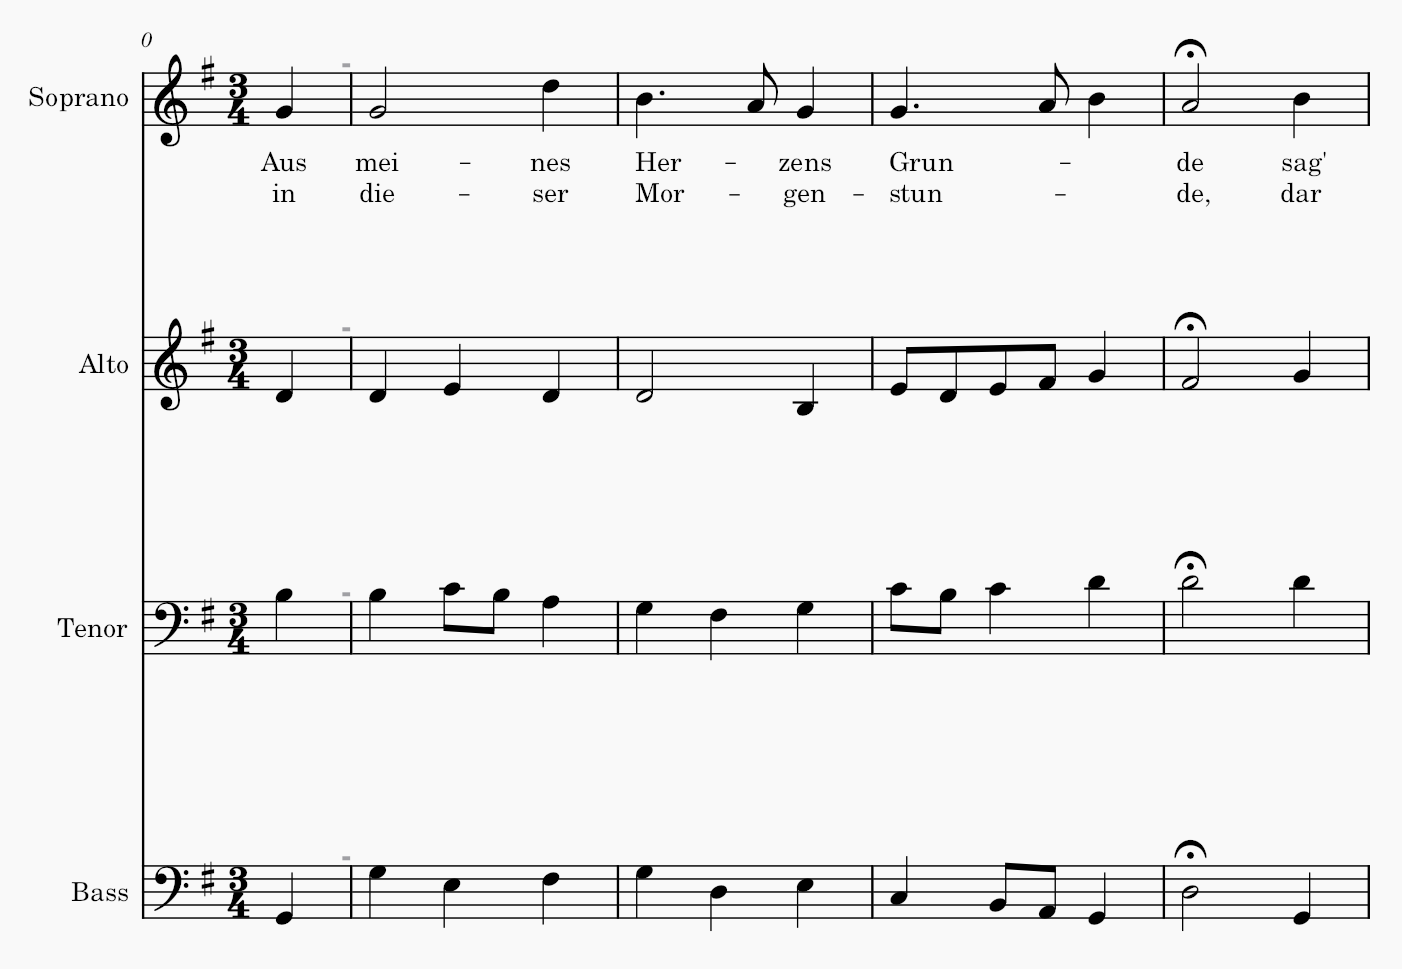

We will start with most fully-functional of the various types of trees, the **TimespanTree**.

In [3]:
# The .asTimespans(flatten=True) method on all Stream objects will get a tree of all timepoints in the piece:
tsTree = bach.asTimespans(flatten=True)
tsTree

<TimespanTree {280} (0.0 to 63.0) <music21.stream.Score bwv269>>

The TimespanTree knows which score it came from, though at this point it is **disconnected** from the original stream.

It knows how many **elements** are in it (280) and what the **flattened offset** range of the tree is (from 0 to 63, or 21 measures of 3/4).

In [4]:
# We can get the first element in the tree as expected:
tsTree[0]

<ElementTimespan (0.0 to 0.0) <music21.text.TextBox 'PDF © 2004...'>>

And iterate over the tree as you might expect:

In [5]:
for ts in tsTree[20:32]:
    print(ts)

<ElementTimespan (0.0 to 0.0) <music21.instrument.Instrument 'P4: Bass: '>>
<ElementTimespan (0.0 to 0.0) <music21.layout.SystemLayout>>
<ElementTimespan (0.0 to 0.0) <music21.layout.StaffLayout distance 130, staffNumber 1, staffSize None, staffLines None>>
<ElementTimespan (0.0 to 0.0) <music21.clef.BassClef>>
<ElementTimespan (0.0 to 0.0) <music21.key.Key of G major>>
<ElementTimespan (0.0 to 0.0) <music21.meter.TimeSignature 3/4>>
<ElementTimespan (0.0 to 0.0) <music21.layout.ScoreLayout>>
<ElementTimespan (0.0 to 0.0) <music21.layout.StaffGroup <music21.stream.Part Soprano><music21.stream.Part Alto><music21.stream.Part Tenor><music21.stream.Part Bass>>>
<PitchedTimespan (0.0 to 1.0) <music21.note.Note G>>
<PitchedTimespan (0.0 to 1.0) <music21.note.Note D>>
<PitchedTimespan (0.0 to 1.0) <music21.note.Note B>>
<PitchedTimespan (0.0 to 1.0) <music21.note.Note G>>


Notice that there are two types of “TimeSpans” in the tree： “**PitchedTimespans**” which contain anything that has one or more pitches, and “**ElementTimespans**” which have everything else

Looking at measure 3 of the score

In [6]:
for ts in tsTree[55:71]:
    print(ts)

<PitchedTimespan (7.0 to 7.5) <music21.note.Note E>>
<PitchedTimespan (7.0 to 7.5) <music21.note.Note C>>
<PitchedTimespan (7.0 to 8.0) <music21.note.Note C>>
<PitchedTimespan (7.0 to 8.5) <music21.note.Note G>>
<PitchedTimespan (7.5 to 8.0) <music21.note.Note D>>
<PitchedTimespan (7.5 to 8.0) <music21.note.Note B>>
<PitchedTimespan (8.0 to 8.5) <music21.note.Note E>>
<PitchedTimespan (8.0 to 8.5) <music21.note.Note B>>
<PitchedTimespan (8.0 to 9.0) <music21.note.Note C>>
<PitchedTimespan (8.5 to 9.0) <music21.note.Note A>>
<PitchedTimespan (8.5 to 9.0) <music21.note.Note F#>>
<PitchedTimespan (8.5 to 9.0) <music21.note.Note A>>
<PitchedTimespan (9.0 to 10.0) <music21.note.Note B>>
<PitchedTimespan (9.0 to 10.0) <music21.note.Note G>>
<PitchedTimespan (9.0 to 10.0) <music21.note.Note D>>
<PitchedTimespan (9.0 to 10.0) <music21.note.Note G>>


The TimeSpans record their offsets from the beginning of the score and their “endTime”.

Note that the notes here are not sorted in any particular order(using indexes in a tree misses the point of them).树结构的子节点没有特定顺序

## So what is the point of a tree?

Trees let programmers find **particular musical elements** extremely fast. 

Like, get all the elements starting at offset 7 with ***elementsStartingAt***

In [7]:
tsTree.elementsStartingAt(7.0)

(<PitchedTimespan (7.0 to 7.5) <music21.note.Note E>>,
 <PitchedTimespan (7.0 to 7.5) <music21.note.Note C>>,
 <PitchedTimespan (7.0 to 8.0) <music21.note.Note C>>,
 <PitchedTimespan (7.0 to 8.5) <music21.note.Note G>>)

to get the actual notes in there, we use the ***.element*** property of the timespan:

In [8]:
[ts.element for ts in tsTree.elementsStartingAt(7.0)]

[<music21.note.Note E>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note G>]

This is basically the same as ***.getElementsByOffsetInHierarchy()***:

In [9]:
list(bach.recurse().notes.getElementsByOffsetInHierarchy(7.0))

[<music21.note.Note G>,
 <music21.note.Note E>,
 <music21.note.Note C>,
 <music21.note.Note C>]

But it is much faster !

It can even find elements ending at a certain point or overlapping a point just as fast:

In [10]:
tsTree.elementsOverlappingOffset(7.5)

(<PitchedTimespan (7.0 to 8.0) <music21.note.Note C>>,
 <PitchedTimespan (7.0 to 8.5) <music21.note.Note G>>)

In [11]:
tsTree.elementsStoppingAt(7.5)

(<PitchedTimespan (7.0 to 7.5) <music21.note.Note E>>,
 <PitchedTimespan (7.0 to 7.5) <music21.note.Note C>>)

A timespan tree knows all of its “timePoints” which are places where an element either stops or starts:

In [12]:
tsTree.allTimePoints()[:13]

(0.0, 1.0, 2.0, 2.5, 3.0, 4.0, 5.0, 5.5, 6.0, 7.0, 7.5, 8.0, 8.5)

In [13]:
bach.measures(3, 4).show('xml')

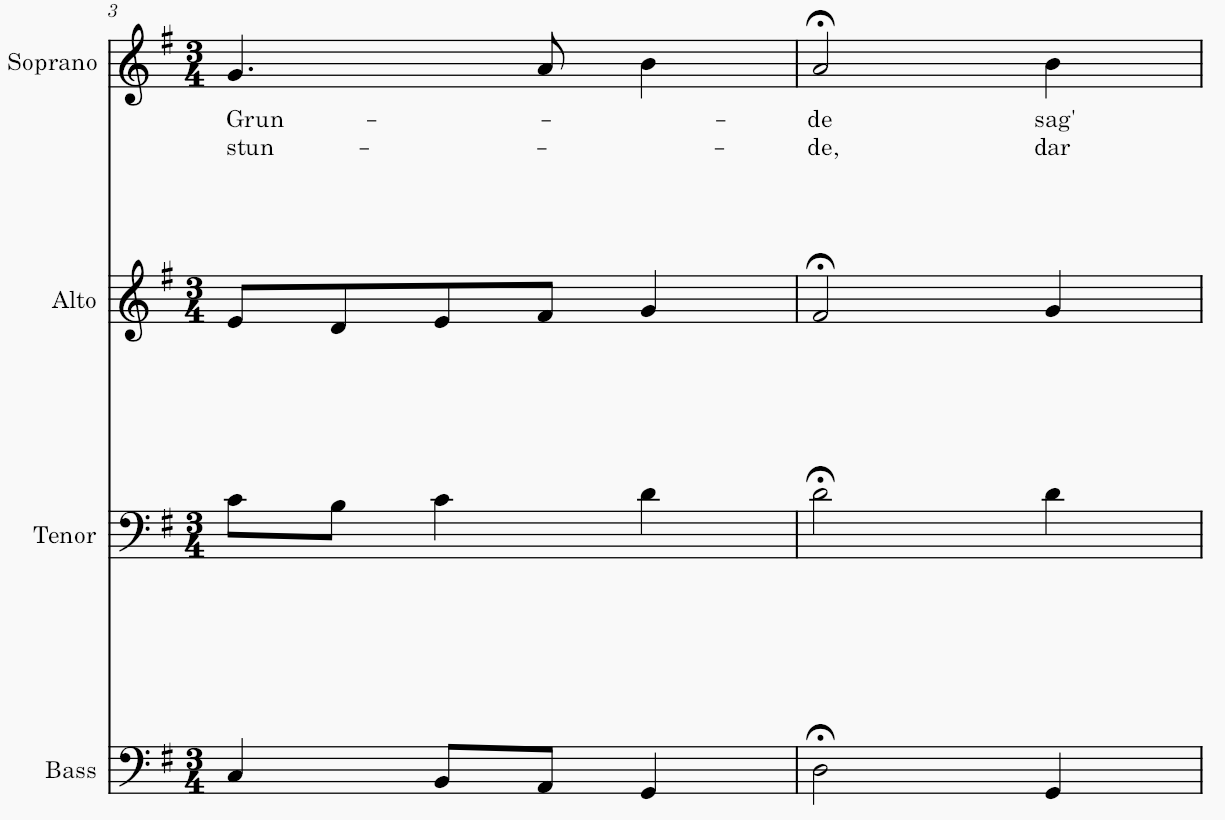

What is the chord sounding on beat 2 (offset 8)? We can find out by creating a “**Verticality**” at this moment:

In [14]:
v = tsTree.getVerticalityAt(8.0)
v

<music21.tree.verticality.Verticality 8.0 {B2 C4 E4 G4}>

The Verticality object knows which elements are just starting:

In [15]:
v.startTimespans

(<PitchedTimespan (8.0 to 8.5) <music21.note.Note E>>,
 <PitchedTimespan (8.0 to 8.5) <music21.note.Note B>>,
 <PitchedTimespan (8.0 to 9.0) <music21.note.Note C>>)

and which are continuing:

In [16]:
v.overlapTimespans

(<PitchedTimespan (7.0 to 8.5) <music21.note.Note G>>,)

It also knows which elements are have just stopped before the Verticality:

In [17]:
v.stopTimespans

(<PitchedTimespan (7.0 to 8.0) <music21.note.Note C>>,
 <PitchedTimespan (7.5 to 8.0) <music21.note.Note D>>,
 <PitchedTimespan (7.5 to 8.0) <music21.note.Note B>>)

These timespans are not properly part of the verticality itself, so their pitches are not listed in the verticality itself. 

Verticalities can also have **non-pitched** objects:

In [19]:
v_start = tsTree.getVerticalityAt(0)
v_start

<music21.tree.verticality.Verticality 0 {G2 B3 D4 G4}>

In [20]:
v_start.startTimespans[:10]

(<ElementTimespan (0.0 to 0.0) <music21.text.TextBox 'PDF © 2004...'>>,
 <ElementTimespan (0.0 to 0.0) <music21.text.TextBox 'BWV 269'>>,
 <ElementTimespan (0.0 to 0.0) <music21.metadata.Metadata object at 0x1aa8952eb80>>,
 <ElementTimespan (0.0 to 0.0) <music21.instrument.Instrument 'P1: Soprano: '>>,
 <ElementTimespan (0.0 to 0.0) <music21.layout.SystemLayout>>,
 <ElementTimespan (0.0 to 0.0) <music21.clef.TrebleClef>>,
 <ElementTimespan (0.0 to 0.0) <music21.key.Key of G major>>,
 <ElementTimespan (0.0 to 0.0) <music21.meter.TimeSignature 3/4>>,
 <ElementTimespan (0.0 to 0.0) <music21.instrument.Instrument 'P2: Alto: '>>,
 <ElementTimespan (0.0 to 0.0) <music21.layout.SystemLayout>>)

Verticalities with PitchedTimespans in them can figure out the bass timespan:

In [21]:
v.bassTimespan

<PitchedTimespan (8.0 to 8.5) <music21.note.Note B>>

They are also still connected to their original tree and know their offset:

In [22]:
v.timespanTree

<TimespanTree {280} (0.0 to 63.0) <music21.stream.Score bwv269>>

In [23]:
v.offset

8.0

And using this information they can get the verticalities just **preceeding or following** them:

In [24]:
(v.previousVerticality, v.nextVerticality)

(<music21.tree.verticality.Verticality 7.5 {C3 B3 D4 G4}>,
 <music21.tree.verticality.Verticality 8.5 {A2 C4 F#4 A4}>)

There is an easy way of getting all the **pitches** in a Verticality:

In [25]:
v.pitchSet

{<music21.pitch.Pitch B2>,
 <music21.pitch.Pitch C4>,
 <music21.pitch.Pitch E4>,
 <music21.pitch.Pitch G4>}

And a Verticality can become a chord:

In [26]:
v_ch = v.toChord()
v_ch

<music21.chord.Chord B2 C4 E4 G4>

This is a very "dumb" chord that just gets a **default duration**.

In [27]:
# even though the time between this verticality and the next one is only 0.5 (eighth note), the duration is still 1.0:
v_ch.duration

<music21.duration.Duration 1.0>

But, combined with the ***.iterateVerticalities()*** method on TimespanTrees, the ***isChord()*** method can make some quick analytical methods.

For instance, how many moments in this chorale are dissonant and how many are consonant?

In [28]:
totalConsonances = 0
totalDissonances = 0
for v in tsTree.iterateVerticalities():
    if v.toChord().isConsonant():
       totalConsonances += 1
    else:
       totalDissonances += 1
(totalConsonances, totalDissonances)

(48, 33)

So about 60% of the vertical moments are consonant, and 40% are dissonant. 

We can sum up the total consonant duration vs. dissonant duration using the ***timeToNextEvent*** property

In [29]:
totalConsonanceDuration = 0
totalDissonanceDuration = 0
for v in tsTree.iterateVerticalities():
    nextTime = v.timeToNextEvent
    if v.toChord().isConsonant():
       totalConsonanceDuration += nextTime
    else:
       totalDissonanceDuration += nextTime
(totalConsonanceDuration, totalDissonanceDuration)

(43.0, 20.0)

it’s about a 2/3 to 1/3 proportion of consonance to dissonance, but it is nice to see that the total adds up to 63(the number of quarter notes in the piece)

A verticality can find all the **VoiceLeadingQuartets** at that moment it begins. 

In [30]:
# e will first create a new tree that does not have anything but GeneralNote objects 
#(otherwise Instrument objects and other such things can get in the way of finding voiceleading moments).
tsTree = bach.asTimespans(flatten=True, classList=(note.GeneralNote,))
v = tsTree.getVerticalityAt(2.0)
v

<music21.tree.verticality.Verticality 2.0 {E3 C4 E4 G4}>

In [31]:
v.getAllVoiceLeadingQuartets()

[<music21.voiceLeading.VoiceLeadingQuartet v1n1=B3, v1n2=C4, v2n1=D4, v2n2=E4>,
 <music21.voiceLeading.VoiceLeadingQuartet v1n1=B3, v1n2=C4, v2n1=G3, v2n2=E3>,
 <music21.voiceLeading.VoiceLeadingQuartet v1n1=B3, v1n2=C4, v2n1=G4, v2n2=G4>,
 <music21.voiceLeading.VoiceLeadingQuartet v1n1=D4, v1n2=E4, v2n1=G3, v2n2=E3>,
 <music21.voiceLeading.VoiceLeadingQuartet v1n1=D4, v1n2=E4, v2n1=G4, v2n2=G4>,
 <music21.voiceLeading.VoiceLeadingQuartet v1n1=G3, v1n2=E3, v2n1=G4, v2n2=G4>]

In [32]:
bach.measures(0, 2).show('xml')

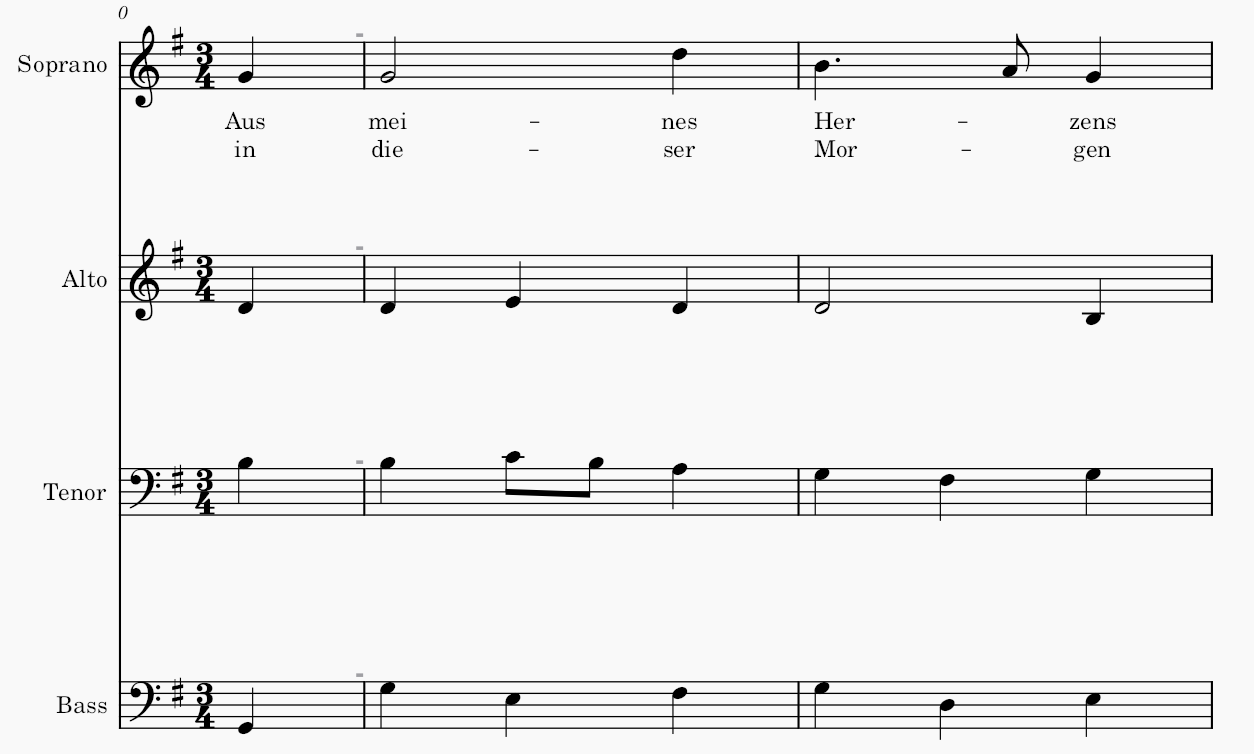

Note again that the **order** simultaneous elements are returned from a tree can seem a bit of voodoo. 

Fortunately, it is possible still to get back what parts the various notes of the VoiceLeadingQuartet come from:

In [33]:
all_vlqs = v.getAllVoiceLeadingQuartets()
vlq0 = all_vlqs[0]
print(vlq0.v1n1, vlq0.v1n1.getContextByClass('Part'))
print(vlq0.v2n1, vlq0.v2n1.getContextByClass('Part'))

<music21.note.Note B> <music21.stream.Part Tenor>
<music21.note.Note D> <music21.stream.Part Alto>


Verticalities can also find all the **paired motions** showing part by part:

In [34]:
v.getPairedMotion()

[(<PitchedTimespan (1.0 to 2.0) <music21.note.Note B>>,
  <PitchedTimespan (2.0 to 2.5) <music21.note.Note C>>),
 (<PitchedTimespan (1.0 to 2.0) <music21.note.Note D>>,
  <PitchedTimespan (2.0 to 3.0) <music21.note.Note E>>),
 (<PitchedTimespan (1.0 to 2.0) <music21.note.Note G>>,
  <PitchedTimespan (2.0 to 3.0) <music21.note.Note E>>),
 (<PitchedTimespan (1.0 to 3.0) <music21.note.Note G>>,
  <PitchedTimespan (1.0 to 3.0) <music21.note.Note G>>)]

## TimeSpans vs Music21Objects

TimeSpans (including PitchedTimeSpans) are **not** Music21Objects, so they cannot be put into Streams.


Rather, they are wrappers around elements already in the Stream, such as Notes, Clefs, etc.


When the TimespanTree is first created, each element is in exactly one TimeSpan, but that **can change**.

In [35]:
# Here we will grab a PitchedTimeSpan from measure 2 and then divide it into two halves
fs_span = tsTree[20]
fs_span

<PitchedTimespan (5.0 to 6.0) <music21.note.Note F#>>

In [36]:
fs_span.splitAt(5.5)

(<PitchedTimespan (5.0 to 5.5) <music21.note.Note F#>>,
 <PitchedTimespan (5.5 to 6.0) <music21.note.Note F#>>)

The timespan itself is **unchanged**:

In [37]:
fs_span

<PitchedTimespan (5.0 to 6.0) <music21.note.Note F#>>

So we will split again and show that the element is the same in both:

In [38]:
first_half, second_half = fs_span.splitAt(5.5)
first_half.element

<music21.note.Note F#>

Splitting the TimeSpan does **not change the duration** of the element:

In [39]:
first_half.element.duration

<music21.duration.Duration 1.0>

Updating a duration of a ***Music21Object*** takes a good amount of processing time.

But, By **manipulating the TimeSpan**'s lengths separately from the object, many changes to a representation of the score can be done before the final output is created.



However, a TimeSpan can create an object with the duration of the TimeSpan:

In [40]:
new_fs = first_half.makeElement()
new_fs

<music21.note.Note F#>

In [41]:
new_fs.duration.quarterLength

0.5

However, the new object is not the same as the old object, but is instead a **copy**:

In [42]:
new_fs is fs_span.element

False

In [43]:
new_fs.derivation.origin is fs_span.element

True

If you want to modify the element in place, call *makeElement(makeCopy=False)*.

Note that when iterating verticalities, the **same TimeSpans** may appear in **multiple verticalities**.

And the **verticality’s distance** to the next verticality is not necessarily the same as any **TimeSpan’s duration**.

In [44]:
p1 = converter.parse('tinyNotation: 4/4 c2. e4')
p2 = converter.parse('tinyNotation: 4/4 E4 G2.')
sc = stream.Score([p1, p2])
sc.show('xml')

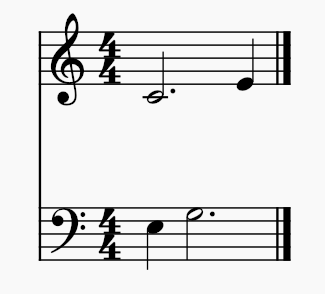

In [45]:
from pprint import pprint
for vert in sc.asTimespans(flatten=True, classList=(note.Note,)).iterateVerticalities():
    pprint([vert.timeToNextEvent, vert.stopTimespans, vert.startTimespans, vert.overlapTimespans])

[1.0,
 (),
 (<PitchedTimespan (0.0 to 1.0) <music21.note.Note E>>,
  <PitchedTimespan (0.0 to 3.0) <music21.note.Note C>>),
 ()]
[2.0,
 (<PitchedTimespan (0.0 to 1.0) <music21.note.Note E>>,),
 (<PitchedTimespan (1.0 to 4.0) <music21.note.Note G>>,),
 (<PitchedTimespan (0.0 to 3.0) <music21.note.Note C>>,)]
[1.0,
 (<PitchedTimespan (0.0 to 3.0) <music21.note.Note C>>,),
 (<PitchedTimespan (3.0 to 4.0) <music21.note.Note E>>,),
 (<PitchedTimespan (1.0 to 4.0) <music21.note.Note G>>,)]


The second Verticality has two quarter notes until the next one, but none of the TimeSpans involved in it, nor their contained elements, have a duration of 2.0.

## *makeElement*: the guts of Chordify

Verticalities have a better way of making elements than toChord, and that is ***makeElement()***.